<a href="https://colab.research.google.com/github/shagunshukla09/weather-prediction-/blob/main/Weather_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
weather=pd.read_csv("/content/weather.csv", index_col="DATE")

In [2]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,9.62,NaN,NaN,0.08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,12.08,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,14.99,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

In [4]:
valid_columns = weather.columns[null_pct < .05]

In [5]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [6]:
weather = weather[valid_columns].copy()

In [7]:
weather.columns = weather.columns.str.lower()

In [8]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


In [9]:
weather=weather.ffill()

In [10]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [27]:
weather.apply(lambda x: (x==9999).sum())

station                0
name                   0
prcp                   0
snow                   0
snwd                   0
tmax                   0
tmin                   0
target                 0
rolling_3_tmax         0
rolling_3_tmax_pct     0
rolling_3_tmin         0
rolling_3_tmin_pct     0
rolling_3_prcp         0
rolling_3_prcp_pct     0
rolling_14_tmax        0
rolling_14_tmax_pct    0
rolling_14_tmin        0
rolling_14_tmin_pct    0
rolling_14_prcp        0
rolling_14_prcp_pct    0
dtype: int64

In [28]:
weather.dtypes

station                 object
name                    object
prcp                   float64
snow                   float64
snwd                   float64
tmax                     int64
tmin                     int64
target                 float64
rolling_3_tmax         float64
rolling_3_tmax_pct     float64
rolling_3_tmin         float64
rolling_3_tmin_pct     float64
rolling_3_prcp         float64
rolling_3_prcp_pct     float64
rolling_14_tmax        float64
rolling_14_tmax_pct    float64
rolling_14_tmin        float64
rolling_14_tmin_pct    float64
rolling_14_prcp        float64
rolling_14_prcp_pct    float64
dtype: object

In [29]:
weather.index

Index(['1970-01-15', '1970-01-16', '1970-01-17', '1970-01-18', '1970-01-19',
       '1970-01-20', '1970-01-21', '1970-01-22', '1970-01-23', '1970-01-24',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19273)

In [30]:
weather.index=pd.to_datetime(weather.index)

In [31]:
weather.index.year.value_counts().sort_index()

DATE
1970    351
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: count, dtype: int64

<Axes: xlabel='DATE'>

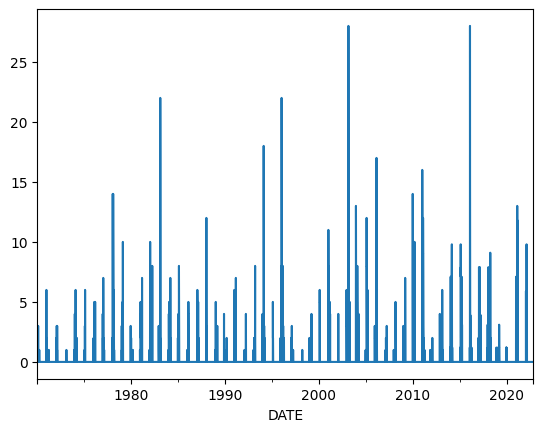

In [32]:
weather["snwd"].plot()

In [12]:
weather["target"]=weather.shift(-1)["tmax"]

In [13]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [14]:
weather.ffill()

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [15]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.1)

In [16]:
predictors=weather.columns[~weather.columns.isin(["target","name","station"])]

In [17]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)


In [33]:

predictions = backtest(weather, rr, predictors)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.912133655894375

In [35]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2022-10-21,0.0,62.788881,62.788881
1990-03-12,85.0,53.844321,31.155679
1998-03-26,80.0,50.488577,29.511423
2007-03-26,78.0,49.226254,28.773746
2003-04-15,86.0,57.315278,28.684722
...,...,...,...
1986-07-01,78.0,77.998161,0.001839
1988-01-10,30.0,29.998219,0.001781
1989-12-02,42.0,41.998683,0.001317


In [36]:
pd.Series(rr.coef_,index=predictors)

prcp                    0.800022
snow                   -0.460282
snwd                    0.140783
tmax                    0.204131
tmin                    0.538118
rolling_3_tmax          0.241836
rolling_3_tmax_pct     11.920603
rolling_3_tmin         -0.314472
rolling_3_tmin_pct     -4.402549
rolling_3_prcp         -2.566443
rolling_3_prcp_pct     -0.227641
rolling_14_tmax         0.349946
rolling_14_tmax_pct    -4.758563
rolling_14_tmin        -0.033107
rolling_14_tmin_pct     2.316393
rolling_14_prcp         1.557337
rolling_14_prcp_pct    -0.133074
dtype: float64

In [37]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)


In [38]:
def expand_mean(df):
    return df.expanding(1).mean()

    for col in ["tmax", "tmin", "prcp"]:
      weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
      weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)


In [39]:
weather=weather.iloc[14:,:]
weather=weather.fillna(0)

In [40]:
predictors=weather.columns[~weather.columns.isin(["target","name","station"])]


In [41]:
predictions=backtest(weather,rr,predictors)
mean_absolute_error(predictions["actual"],predictions["prediction"])

4.912060430057957

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions["actual"],predictions["prediction"])


39.8568530141755

In [43]:
predictions.sort_values("diff",ascending=False)


,actual,prediction,diff
DATE,,,
2022-10-21,0.0,62.789660,62.789660
1990-03-12,85.0,53.810457,31.189543
1998-03-26,80.0,50.474771,29.525229
2007-03-26,78.0,49.216455,28.783545
2003-04-15,86.0,57.303496,28.696504
...,...,...,...
2013-02-15,45.0,44.997501,0.002499
2017-09-07,75.0,75.002119,0.002119
2012-08-04,87.0,87.001450,0.001450


In [44]:
weather.loc["1990-03-07":"1990-03-17"]


,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,39.0,33.666667,-0.049505,19.000000,-0.263158,0.070000,-1.000000,41.571429,-0.230241,25.000000,-0.440000,0.047857,-1.000000
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,43.0,35.000000,0.114286,18.666667,0.071429,0.070000,-1.000000,40.571429,-0.038732,24.071429,-0.169139,0.040714,-1.000000
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,47.0,38.000000,0.131579,21.000000,0.380952,0.003333,2.000000,39.214286,0.096539,22.785714,0.272727,0.031429,-0.681818
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,59.0,43.000000,0.093023,29.333333,0.329545,0.006667,0.500000,38.928571,0.207339,23.428571,0.664634,0.020714,-0.517241
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,59.0,49.666667,0.187919,36.333333,0.128440,0.023333,1.142857,40.785714,0.446585,25.500000,0.607843,0.021429,1.333333
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,55.000000,0.072727,41.000000,0.048780,0.020000,-1.000000,43.285714,0.363036,27.928571,0.539642,0.021429,-1.000000
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,41.666667,-0.016000,0.016667,-1.000000,46.714286,0.819572,29.500000,0.389831,0.020000,-1.000000
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,43.333333,0.061538,0.000000,0.000000,48.357143,0.282127,30.857143,0.490741,0.020000,-1.000000
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,43.333333,-0.007692,0.000000,0.000000,49.428571,0.112717,32.214286,0.334812,0.020000,-1.000000


<Axes: xlabel='diff'>

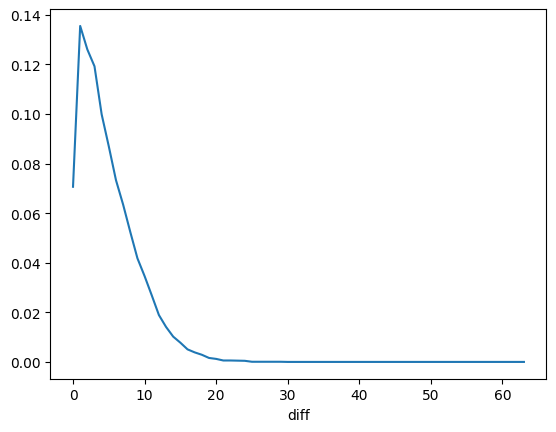

In [45]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()


In [46]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-27,37.0,38.721764,1.721764
1980-01-28,31.0,39.980067,8.980067
1980-01-29,28.0,35.890106,7.890106
1980-01-30,26.0,30.757170,4.757170
1980-01-31,24.0,29.147375,5.147375
...,...,...,...
2022-10-17,58.0,68.214388,10.214388
2022-10-18,56.0,62.637813,6.637813
2022-10-19,61.0,59.880240,1.119760
